# Kids Suicide 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('S1Table.csv')
data.head()

,number,grade,class,gender,age,single,sibling,family,outwork,totaltime,...,Parenting style,income,Level of abuse,Level of Negative events,Level of loneliness,Caregiver,LBC,Level of neglect,Age of you when your parents migrate to work,Frequency of communication with parents
0,7918.0,11.0,35.00,1.0,NaN,2.0,9.00,1.0,4.0,#NULL!,...,1.00,#NULL!,0.00,2.00,2.00,1.00,0.0,1.00,#NULL!,#NULL!
1,13952.0,10.0,20.00,2.0,NaN,2.0,2.00,6.0,3.0,1.00,...,1.00,#NULL!,1.00,2.00,3.00,3.00,1.0,2.00,1.00,1.00
2,7917.0,10.0,4.00,1.0,NaN,9.0,9.00,1.0,4.0,#NULL!,...,5.00,2.00,1.00,#NULL!,2.00,1.00,0.0,3.00,#NULL!,#NULL!
3,13951.0,9.0,1.00,1.0,NaN,2.0,2.00,1.0,1.0,1.00,...,1.00,1.00,0.00,2.00,#NULL!,1.00,1.0,#NULL!,2.00,1.00
4,7916.0,8.0,10.00,2.0,NaN,1.0,#NULL!,1.0,4.0,#NULL!,...,1.00,1.00,1.00,2.00,2.00,1.00,0.0,1.00,#NULL!,#NULL!


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13952 entries, 0 to 13951
Data columns (total 31 columns):
number                                          13952 non-null float64
grade                                           13952 non-null float64
class                                           13952 non-null object
gender                                          13952 non-null float64
age                                             13947 non-null float64
single                                          13952 non-null float64
sibling                                         13952 non-null object
family                                          13952 non-null float64
outwork                                         13952 non-null float64
totaltime                                       13952 non-null object
when                                            13952 non-null object
contact                                         13952 non-null object
reunite                                     

In [4]:
data.describe()

,number,grade,gender,age,single,family,outwork,parenting,insanity,LBC
count,13952.000000,13952.000000,13952.000000,13947.000000,13952.000000,13952.000000,13952.000000,13952.000000,13952.000000,13952.000000
mean,6976.500000,9.335077,1.488604,15.199756,1.696101,1.733300,3.072678,2.473982,2.403096,0.432483
std,4027.739813,1.690531,0.608531,1.773765,0.710342,1.410473,1.244249,1.968801,1.723587,0.495438
min,1.000000,7.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3488.750000,8.000000,1.000000,14.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,6976.500000,9.000000,1.000000,15.000000,2.000000,1.000000,4.000000,2.000000,2.000000,0.000000
75%,10464.250000,11.000000,2.000000,17.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
max,13952.000000,12.000000,9.000000,18.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000


In [5]:
data.columns

Index(['number', 'grade', 'class', 'gender', 'age', 'single', 'sibling',
       'family', 'outwork', 'totaltime', 'when', 'contact', 'reunite', 'long',
       'parenting', 'insanity', 'suicide attempts',
       'Father's degree of culture', 'Mother's degree of culture',
       'The culture of the primary caregiver', 'Family type',
       'Parenting style', 'income', 'Level of abuse',
       'Level of Negative events', 'Level of loneliness', 'Caregiver', 'LBC',
       'Level of neglect', 'Age of you when your parents migrate to work',
       'Frequency of communication with parents'],
      dtype='object')

In [6]:
data.gender.unique()

array([1., 2., 9.])

In [7]:
data.gender.value_counts()

1.0    7345
2.0    6577
9.0      30
Name: gender, dtype: int64

In [8]:
data.age.unique()

array([nan, 10., 11., 12., 13., 14., 15., 16., 17., 18.])

In [9]:
data.age.value_counts()

14.0    2593
16.0    2385
15.0    2247
17.0    2161
13.0    2148
18.0    1713
12.0     632
11.0      65
10.0       3
Name: age, dtype: int64

In [10]:
data["Age of you when your parents migrate to work"].unique()

array(['#NULL!', '1.00', '2.00', '3.00'], dtype=object)

In [11]:
data["Age of you when your parents migrate to work"].value_counts()

#NULL!    8060
1.00      2921
2.00      1872
3.00      1099
Name: Age of you when your parents migrate to work, dtype: int64

In [12]:
data.number.unique()

array([ 7918., 13952.,  7917., ...,   490.,   803.,  8362.])

In [13]:
data.grade.unique()

array([11., 10.,  9.,  8.,  7., 12.])

In [14]:
data.grade.value_counts()

8.0     2678
7.0     2556
9.0     2335
10.0    2254
11.0    2176
12.0    1953
Name: grade, dtype: int64

In [15]:
data["class"].unique()

array(['35.00', '20.00', '4.00', '1.00', '10.00', '3.00', '27.00', '2.00',
       '#NULL!', '8.00', '17.00', '5.00', '7.00', '15.00', '6.00',
       '12.00', '11.00', '18.00', '13.00', '9.00', '55.00', '99.00',
       '98.00', '0.00', '52.00', '30.00', '28.00', '25.00', '48.00',
       '45.00', '42.00', '46.00', '14.00', '41.00', '29.00', '22.00',
       '21.00', '23.00', '24.00', '43.00', '49.00', '90.00', '39.00',
       '89.00', '38.00', '50.00', '16.00', '26.00', '40.00', '37.00',
       '34.00', '33.00', '36.00', '19.00'], dtype=object)

In [16]:
data["class"].value_counts()

1.00      2063
3.00      1901
2.00      1799
5.00      1520
4.00      1461
6.00      1027
7.00       729
8.00       589
22.00      165
9.00       157
10.00      154
21.00      153
15.00      150
11.00      116
#NULL!     114
20.00      111
24.00      107
23.00      107
12.00      105
13.00      100
16.00       88
25.00       83
0.00        81
18.00       79
35.00       70
34.00       57
27.00       57
28.00       56
14.00       55
19.00       53
36.00       53
46.00       51
50.00       51
30.00       47
33.00       47
89.00       46
29.00       43
17.00       42
45.00       38
48.00       36
90.00       29
98.00       27
41.00       25
38.00       24
39.00       16
37.00       16
40.00       16
99.00       10
26.00        8
42.00        7
52.00        5
43.00        5
55.00        2
49.00        1
Name: class, dtype: int64

In [17]:
data.single.value_counts()

2.0    9128
1.0    4751
9.0      73
Name: single, dtype: int64

In [18]:
data.sibling.unique()

array(['9.00', '2.00', '#NULL!', '5.00', '1.00', '3.00', '4.00', '6.00',
       '8.00', '7.00'], dtype=object)

In [19]:
data.family.unique()

array([1., 6., 5., 2., 4., 9., 3.])

In [20]:
data.outwork.unique()

array([4., 3., 1., 2., 9.])

In [21]:
data.totaltime.unique()

array(['#NULL!', '1.00', '3.00', '2.00', '4.00', '9.00'], dtype=object)

In [22]:
data.when.unique()

array(['#NULL!', '2.00', '3.00', '1.00', '4.00', '9.00'], dtype=object)

In [23]:
data["contact"].unique()

array(['#NULL!', '1.00', '9.00', '2.00', '3.00', '5.00', '4.00'],
      dtype=object)

In [24]:
data["reunite"].unique()

array(['#NULL!', '3.00', '1.00', '4.00', '2.00', '9.00', '5.00'],
      dtype=object)

In [25]:
data["long"].unique()

array(['#NULL!', '1.00', '2.00', '9.00', '4.00', '3.00'], dtype=object)

In [26]:
data["parenting"].unique()

array([2., 6., 9., 1., 5., 3., 4.])

In [27]:
data["Parenting style"].value_counts()

1.00      11253
5.00       1270
#NULL!      627
2.00        501
3.00        217
4.00         84
Name: Parenting style, dtype: int64

In [28]:
data["insanity"].unique()

array([2., 9., 1.])

In [29]:
data["suicide attempts"].unique()

array(['0.00', '#NULL!', '1.00'], dtype=object)

In [30]:
data["suicide attempts"].value_counts()

0.00      13298
1.00        446
#NULL!      208
Name: suicide attempts, dtype: int64

In [31]:
data["Father's degree of culture"].unique()

array(['2.00', '3.00', '4.00', '1.00', '#NULL!'], dtype=object)

In [32]:
data["Father's degree of culture"].describe()

count     13952
unique        5
top        2.00
freq       7473
Name: Father's degree of culture, dtype: object

In [33]:
data["Mother's degree of culture"].unique()

array(['2.00', '1.00', '4.00', '3.00', '#NULL!'], dtype=object)

In [34]:
data["The culture of the primary caregiver"].unique()

array(['2.00', '#NULL!', '4.00', '3.00', '1.00'], dtype=object)

In [35]:
data["Family type"].unique()

array(['1.00', '5.00', '4.00', '2.00', '#NULL!', '3.00'], dtype=object)

In [36]:
data["Parenting style"].unique()

array(['1.00', '5.00', '#NULL!', '4.00', '2.00', '3.00'], dtype=object)

In [37]:
data["income"].unique()

array(['#NULL!', '2.00', '1.00', '3.00'], dtype=object)

In [38]:
data["Level of abuse"].unique()

array(['0.00', '1.00', '2.00', '3.00', '#NULL!'], dtype=object)

In [39]:
data["Level of abuse"].value_counts()

0.00      7406
2.00      3767
1.00      2182
3.00       557
#NULL!      40
Name: Level of abuse, dtype: int64

In [40]:
data["Level of Negative events"].unique()

array(['2.00', '#NULL!', '1.00', '3.00'], dtype=object)

In [41]:
data["Level of Negative events"].value_counts()

2.00      9627
3.00      1854
1.00      1768
#NULL!     703
Name: Level of Negative events, dtype: int64

In [42]:
data["Level of loneliness"].unique()

array(['2.00', '3.00', '#NULL!', '1.00'], dtype=object)

In [43]:
data["Level of loneliness"].value_counts()

2.00      9358
3.00      2181
1.00      1849
#NULL!     564
Name: Level of loneliness, dtype: int64

In [44]:
data["Level of neglect"].unique()

array(['1.00', '2.00', '3.00', '#NULL!', '0.00'], dtype=object)

In [45]:
data['Level of neglect'].value_counts()

1.00      5245
0.00      4567
2.00      3115
3.00       884
#NULL!     141
Name: Level of neglect, dtype: int64

In [46]:
data["Caregiver"].unique()

array(['1.00', '3.00', '2.00', '4.00', '6.00', '#NULL!', '5.00'],
      dtype=object)

In [47]:
data["LBC"].unique()

array([0., 1.])

In [48]:
data["LBC"].value_counts()

0.0    7918
1.0    6034
Name: LBC, dtype: int64

In [49]:
data["Age of you when your parents migrate to work"].unique()

array(['#NULL!', '1.00', '2.00', '3.00'], dtype=object)

In [50]:
data['Age of you when your parents migrate to work'].value_counts()

#NULL!    8060
1.00      2921
2.00      1872
3.00      1099
Name: Age of you when your parents migrate to work, dtype: int64

In [51]:
data['Frequency of communication with parents'].unique()

array(['#NULL!', '1.00', '2.00', '4.00', '3.00'], dtype=object)

In [52]:
data['Frequency of communication with parents'].describe()

count      13952
unique         5
top       #NULL!
freq        7995
Name: Frequency of communication with parents, dtype: object

In [53]:
data['Frequency of communication with parents'].value_counts()

#NULL!    7995
1.00      4869
2.00       780
3.00       232
4.00        76
Name: Frequency of communication with parents, dtype: int64

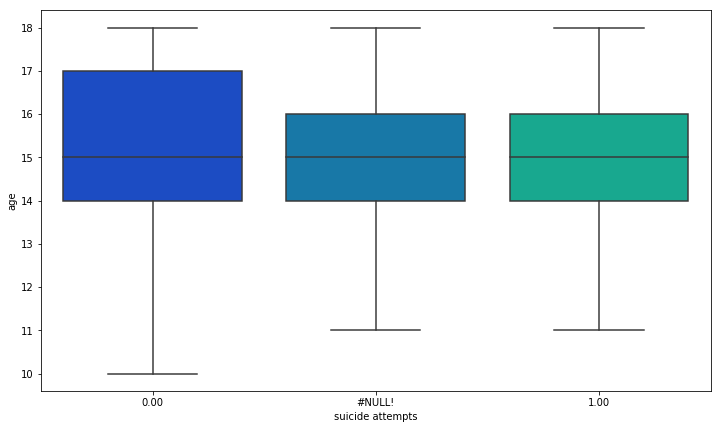

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='suicide attempts',y='age',data=data,palette='winter')

##### Most of the Kids who attempt suicide are between 14 and 17 years old 

Text(0.5,1,'Frequency of communication with parents')

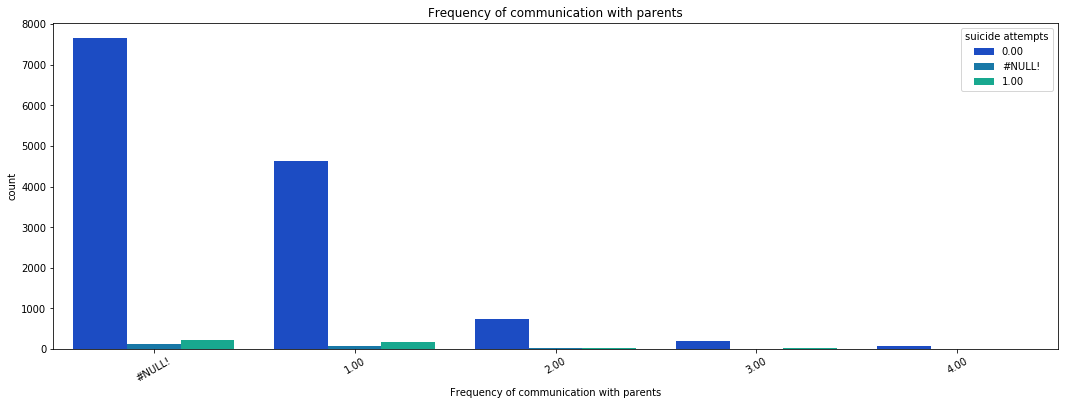

In [55]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Frequency of communication with parents",hue='suicide attempts', data=data,palette='winter',order=data['Frequency of communication with parents'].value_counts().index)
plt.xticks(rotation=30)
plt.title("Frequency of communication with parents")

Text(0.5,1,'Age of you when your parents migrate to work')

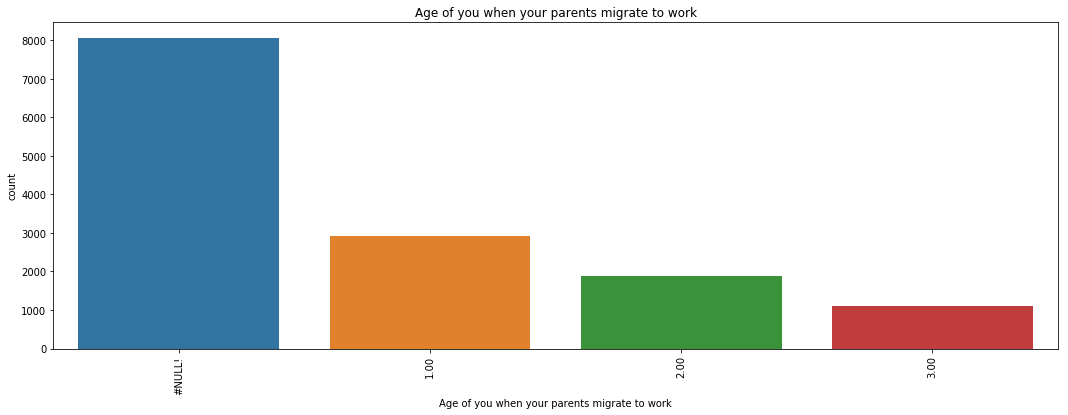

In [56]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Age of you when your parents migrate to work", data=data,order=data['Age of you when your parents migrate to work'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Age of you when your parents migrate to work")

Text(0.5,1,'Level of neglect')

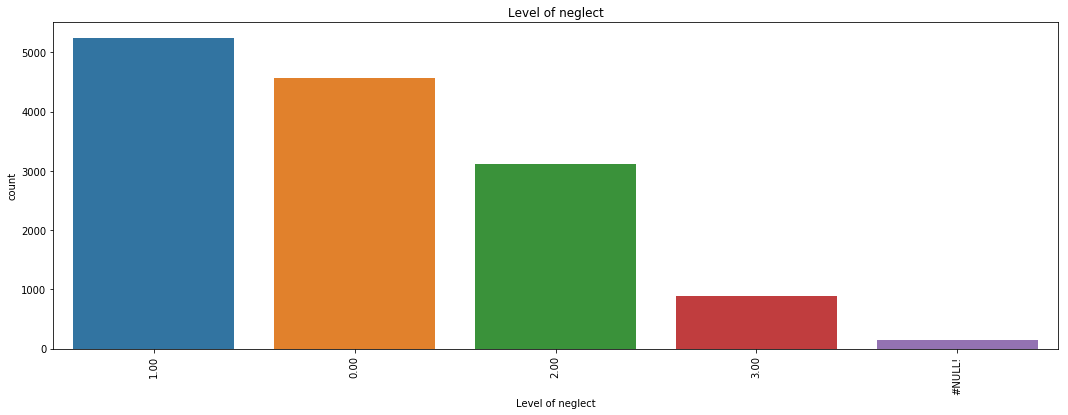

In [57]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Level of neglect", data=data,order=data['Level of neglect'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Level of neglect")

In [60]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 55 , 25 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True,
        annot_kws = { 'fontsize' : 12 })

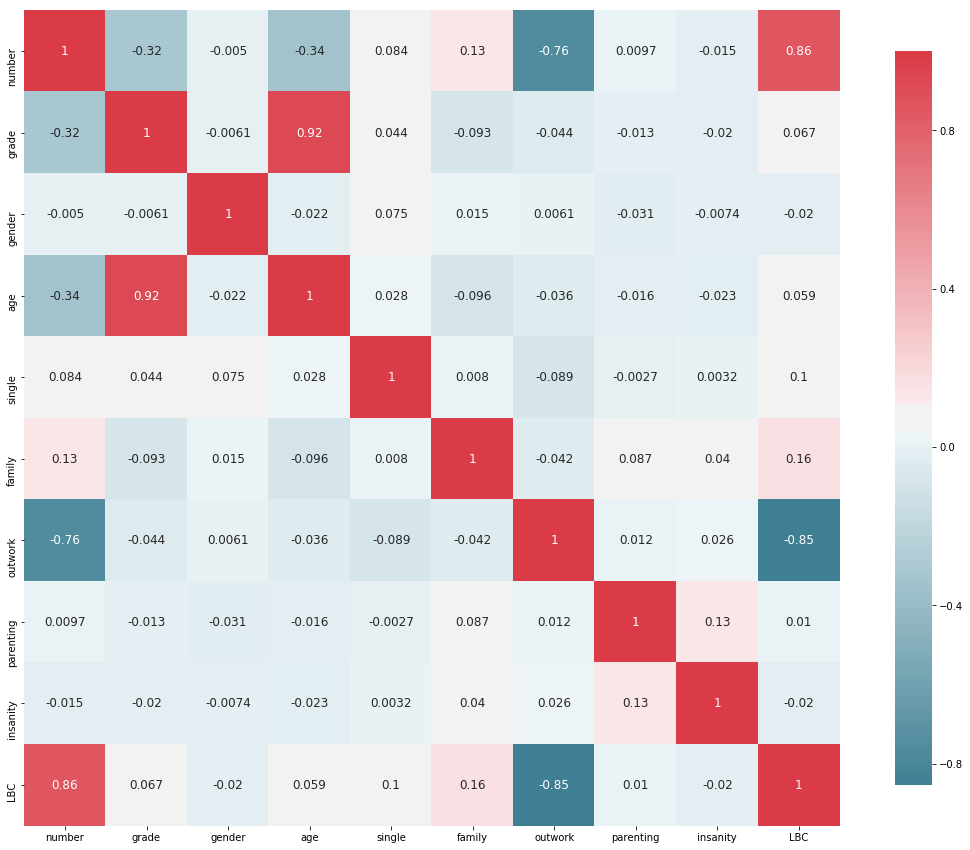

In [61]:
plot_correlation_map( data )

In [58]:
data["class"] = pd.to_numeric(data["class"], errors='coerce')
data["sibling"] = pd.to_numeric(data["sibling"], errors='coerce')                                           
data["totaltime"] = pd.to_numeric(data["totaltime"], errors='coerce')
data["when"] = pd.to_numeric(data["when"], errors='coerce')
data["contact"] = pd.to_numeric(data["contact"], errors='coerce')
data["reunite"] = pd.to_numeric(data["reunite"], errors='coerce')
data["long"] = pd.to_numeric(data["long"], errors='coerce')
data["suicide attempts"] = pd.to_numeric(data["suicide attempts"], errors='coerce')
data["Father's degree of culture"] = pd.to_numeric(data["Father's degree of culture"], errors='coerce')
data["Mother's degree of culture"] = pd.to_numeric(data["Mother's degree of culture"], errors='coerce')
data["The culture of the primary caregiver"] = pd.to_numeric(data["The culture of the primary caregiver"], errors='coerce')
data["Family type"] = pd.to_numeric(data["Caregiver"], errors='coerce')
data["Parenting style"] = pd.to_numeric(data["Parenting style"], errors='coerce')
data["income"] = pd.to_numeric(data["income"], errors='coerce')
data["Level of abuse"] = pd.to_numeric(data["Level of abuse"], errors='coerce')
data["Level of Negative events"] = pd.to_numeric(data["Level of Negative events"], errors='coerce')
data["Level of loneliness"] = pd.to_numeric(data["Level of loneliness"], errors='coerce')
data["Caregiver"] = pd.to_numeric(data["Caregiver"], errors='coerce')
data["Level of neglect"] = pd.to_numeric(data["Level of neglect"], errors='coerce')
data["Age of you when your parents migrate to work"] = pd.to_numeric(data["Age of you when your parents migrate to work"], errors='coerce')
data["Frequency of communication with parents"] = pd.to_numeric(data["Frequency of communication with parents"], errors='coerce')

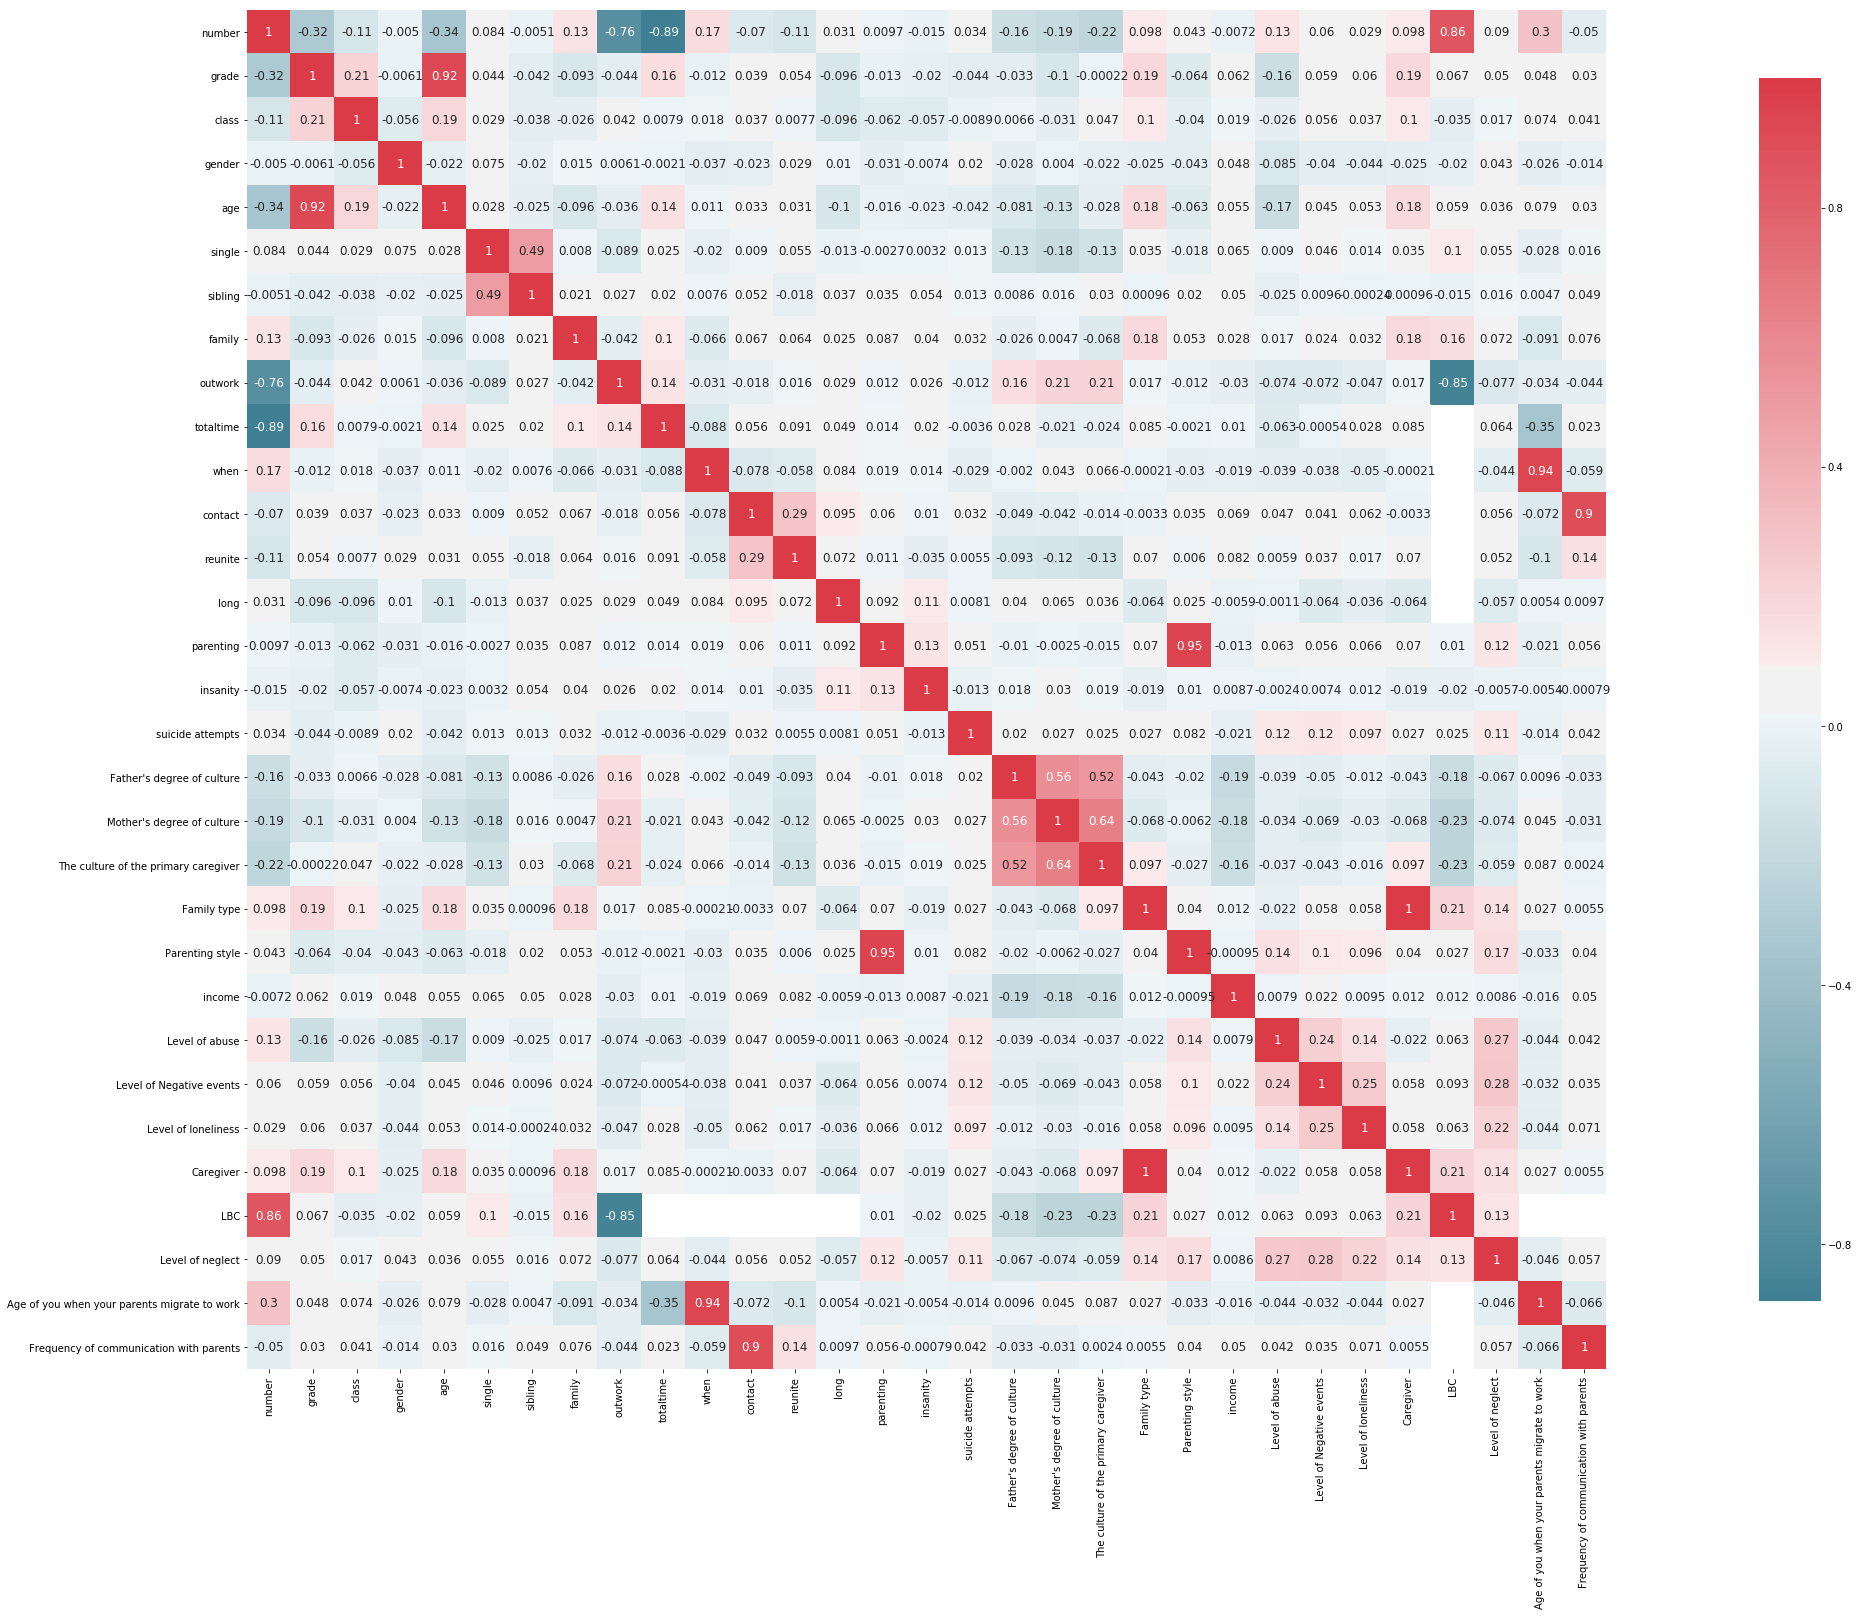

In [61]:
plot_correlation_map( data )

Text(0.5,0,'class')

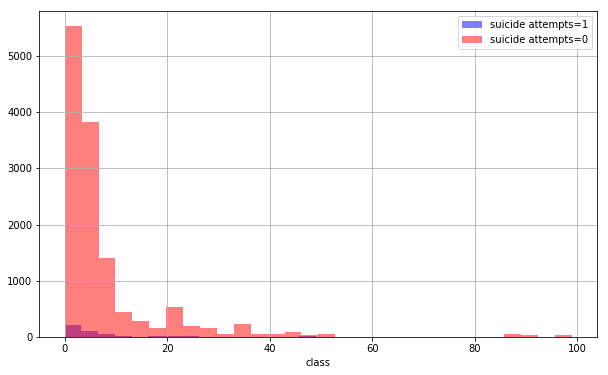

In [62]:
plt.figure(figsize=(10,6))
data[data['suicide attempts']==1]['class'].hist(alpha=0.5,color='blue',
                                              bins=30,label='suicide attempts=1')
data[data['suicide attempts']==0]['class'].hist(alpha=0.5,color='red',
                                              bins=30,label='suicide attempts=0')
plt.legend()
plt.xlabel('class')

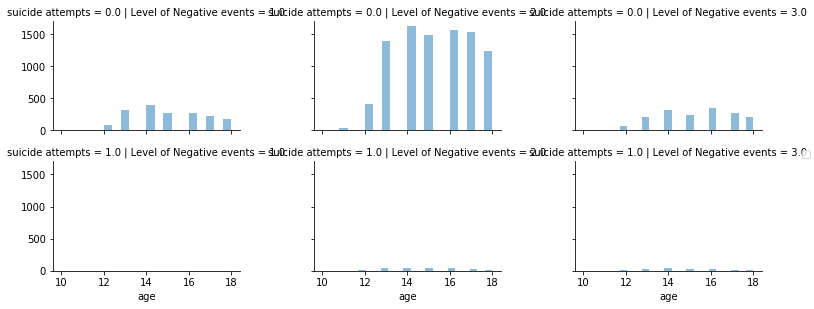

In [63]:
grid = sns.FacetGrid(data, col='Level of Negative events', row='suicide attempts', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

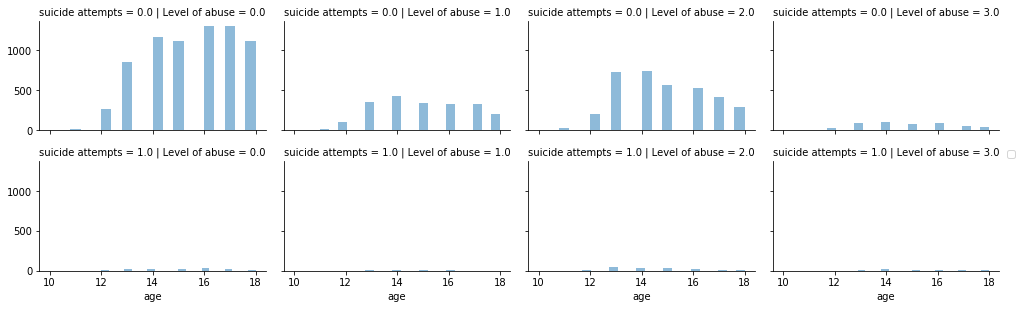

In [64]:
grid = sns.FacetGrid(data, col='Level of abuse', row='suicide attempts', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [65]:
data.describe()

,number,grade,class,gender,age,single,sibling,family,outwork,totaltime,...,Parenting style,income,Level of abuse,Level of Negative events,Level of loneliness,Caregiver,LBC,Level of neglect,Age of you when your parents migrate to work,Frequency of communication with parents
count,13952.000000,13952.000000,13838.000000,13952.000000,13947.000000,13952.000000,9186.000000,13952.000000,13952.000000,6030.000000,...,13325.000000,13263.000000,13912.000000,13249.000000,13388.000000,13778.000000,13952.000000,13811.000000,5892.000000,5957.000000
mean,6976.500000,9.335077,7.842607,1.488604,15.199756,1.696101,2.029828,1.733300,3.072678,2.509950,...,1.470319,1.797331,0.818502,2.006491,2.024798,1.819640,0.432483,1.022880,1.690767,1.247104
std,4027.739813,1.690531,11.692648,0.608531,1.773765,0.710342,1.126792,1.410473,1.244249,1.519755,...,1.209685,0.639712,0.964570,0.522836,0.548109,1.472962,0.495438,0.900992,0.766000,0.583559
min,1.000000,7.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3488.750000,8.000000,2.000000,1.000000,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,6976.500000,9.000000,4.000000,1.000000,15.000000,2.000000,2.000000,1.000000,4.000000,2.000000,...,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,10464.250000,11.000000,7.000000,2.000000,17.000000,2.000000,2.000000,2.000000,4.000000,4.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
max,13952.000000,12.000000,99.000000,9.000000,18.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,5.000000,3.000000,3.000000,3.000000,3.000000,6.000000,1.000000,3.000000,3.000000,4.000000


In [66]:
data.drop(['grade','number','outwork',"Mother's degree of culture","Father's degree of culture","when","contact"],axis=1,inplace=True)
data.head()

,class,gender,age,single,sibling,family,totaltime,reunite,long,parenting,...,Parenting style,income,Level of abuse,Level of Negative events,Level of loneliness,Caregiver,LBC,Level of neglect,Age of you when your parents migrate to work,Frequency of communication with parents
0,35.0,1.0,NaN,2.0,9.0,1.0,NaN,NaN,NaN,2.0,...,1.0,NaN,0.0,2.0,2.0,1.0,0.0,1.0,NaN,NaN
1,20.0,2.0,NaN,2.0,2.0,6.0,1.0,3.0,1.0,2.0,...,1.0,NaN,1.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0
2,4.0,1.0,NaN,9.0,9.0,1.0,NaN,NaN,NaN,6.0,...,5.0,2.0,1.0,NaN,2.0,1.0,0.0,3.0,NaN,NaN
3,1.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0.0,2.0,NaN,1.0,1.0,NaN,2.0,1.0
4,10.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,NaN,NaN


In [67]:
data.isnull().sum()

class                                            114
gender                                             0
age                                                5
single                                             0
sibling                                         4766
family                                             0
totaltime                                       7922
reunite                                         7922
long                                            7922
parenting                                          0
insanity                                           0
suicide attempts                                 208
The culture of the primary caregiver             268
Family type                                      174
Parenting style                                  627
income                                           689
Level of abuse                                    40
Level of Negative events                         703
Level of loneliness                           

In [68]:
data = data.fillna(0)

In [69]:
data

,class,gender,age,single,sibling,family,totaltime,reunite,long,parenting,...,Parenting style,income,Level of abuse,Level of Negative events,Level of loneliness,Caregiver,LBC,Level of neglect,Age of you when your parents migrate to work,Frequency of communication with parents
0,35.0,1.0,0.0,2.0,9.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
1,20.0,2.0,0.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0,...,1.0,0.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0
2,4.0,1.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,6.0,...,5.0,2.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0
3,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0
4,10.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
5,3.0,9.0,10.0,1.0,0.0,5.0,0.0,0.0,0.0,2.0,...,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
6,1.0,2.0,10.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0
7,1.0,1.0,10.0,1.0,0.0,1.0,3.0,4.0,2.0,2.0,...,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
8,27.0,1.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,...,5.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
9,1.0,1.0,11.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,...,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [70]:
for i in range(len(data)):
    if (data['Frequency of communication with parents'][i]==0):
        if (data['LBC'][i]==1):
            data['Frequency of communication with parents'][i]=1
        else:
            data['Frequency of communication with parents'][i]=2

In [71]:
data['Frequency of communication with parents'].value_counts()

2.0    8698
1.0    4946
3.0     232
4.0      76
Name: Frequency of communication with parents, dtype: int64

In [72]:
data['Frequency of communication with parents'].value_counts()

2.0    8698
1.0    4946
3.0     232
4.0      76
Name: Frequency of communication with parents, dtype: int64

In [73]:
for i in range (5):
    data["age"][i]=14
print (data["age"].head())

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: age, dtype: float64


In [74]:
for i in range(len(data)):
    if (data['sibling'][i]==0):
        if (data['single'][i]==1):
            data['sibling'][i]=0
        else:
            data['sibling'][i]=2

In [75]:
data["sibling"].value_counts()

2.0    5411
0.0    4751
1.0    2370
3.0     971
4.0     226
9.0     126
5.0      66
6.0      18
7.0       9
8.0       4
Name: sibling, dtype: int64

In [76]:
data["totaltime"].value_counts()

0.0    7922
1.0    2099
4.0    1674
2.0    1127
3.0    1014
9.0     116
Name: totaltime, dtype: int64

In [77]:
for i in range(len(data)):
    if (data['The culture of the primary caregiver'][i]==0):
            data['The culture of the primary caregiver'][i]=2
data["The culture of the primary caregiver"].value_counts()

2.0    6353
1.0    3883
3.0    2845
4.0     871
Name: The culture of the primary caregiver, dtype: int64

In [78]:
for i in range(len(data)):
    if (data['Family type'][i]==0):
            data['Family type'][i]=1
data["Family type"].value_counts()

1.0    9546
3.0    1855
2.0    1197
6.0    1038
5.0     248
4.0      68
Name: Family type, dtype: int64

In [79]:
for i in range(len(data)):
    if (data['Parenting style'][i]==0):
            data['Parenting style'][i]=2
data["Parenting style"].value_counts()

1.0    11253
5.0     1270
2.0     1128
3.0      217
4.0       84
Name: Parenting style, dtype: int64

In [80]:
for i in range(len(data)):
    if (data['income'][i]==0):
            data['income'][i]=2
data["income"].value_counts()

2.0    7980
1.0    4330
3.0    1642
Name: income, dtype: int64

In [81]:
data["Level of abuse"].value_counts()

0.0    7446
2.0    3767
1.0    2182
3.0     557
Name: Level of abuse, dtype: int64

In [82]:
data["Level of neglect"].value_counts()

1.0    5245
0.0    4708
2.0    3115
3.0     884
Name: Level of neglect, dtype: int64

In [83]:
for i in range(len(data)):
    if (data['Level of loneliness'][i]==0):
            data['Level of loneliness'][i]=2
data["Level of loneliness"].value_counts()

2.0    9922
3.0    2181
1.0    1849
Name: Level of loneliness, dtype: int64

In [84]:
for i in range(len(data)):
    if (data['Level of Negative events'][i]==0):
            data['Level of Negative events'][i]=2
data["Level of Negative events"].value_counts()

2.0    10330
3.0     1854
1.0     1768
Name: Level of Negative events, dtype: int64

In [85]:
for i in range(len(data)):
    if (data['Caregiver'][i]==0):
            data['Caregiver'][i]=1
data["Caregiver"].value_counts()

1.0    9546
3.0    1855
2.0    1197
6.0    1038
5.0     248
4.0      68
Name: Caregiver, dtype: int64

In [86]:
data["Age of you when your parents migrate to work"].value_counts()

0.0    8060
1.0    2921
2.0    1872
3.0    1099
Name: Age of you when your parents migrate to work, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = data[['class', 'age', 'gender','single', 'sibling','family',
          'Age of you when your parents migrate to work','totaltime','Caregiver','The culture of the primary caregiver','income','Parenting style',
          'Family type','totaltime',
          'reunite', 'long', 'parenting', 'insanity','LBC',
          'Frequency of communication with parents','Level of neglect',
          'Level of loneliness','Level of Negative events','Level of abuse']]
y = data['suicide attempts']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
predictions = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix


In [95]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      4465
        1.0       1.00      0.01      0.01       140

avg / total       0.97      0.97      0.96      4605



In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [99]:
pred = knn.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(confusion_matrix(y_test,pred))

[[4358  107]
 [ 134    6]]


In [102]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97      4465
        1.0       0.05      0.04      0.05       140

avg / total       0.94      0.95      0.94      4605



In [103]:
error_rate = []

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

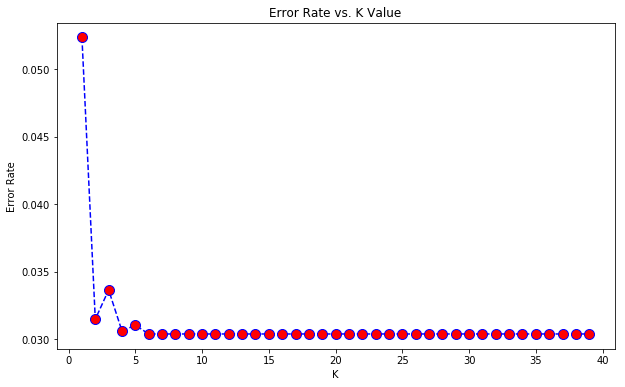

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[4465    0]
 [ 140    0]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      4465
        1.0       0.00      0.00      0.00       140

avg / total       0.94      0.97      0.95      4605



C:\Users\hajer ben taarit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
data['suicide attempts'].value_counts()

0.0    13506
1.0      446
Name: suicide attempts, dtype: int64